
# Quiz - Exercise

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [37]:
customers = pd.read_csv("../data/quiz.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,NaN,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,496.000000,497.000000,497.000000,498.000000,499.000000
mean,33.052950,12.052674,37.060539,3.533548,499.314387
std,0.996552,0.997215,1.013539,1.001282,79.394375
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.338172,11.386776,36.339521,2.928110,445.014369
50%,33.078224,11.979061,37.073616,3.533975,498.635599
75%,33.716374,12.759169,37.717771,4.128337,549.496082
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      496 non-null float64
Time_on_App             497 non-null float64
Time_on_Website         497 non-null float64
Length_of_Membership    498 non-null float64
Yearly_Amount_Spent     499 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the quiz we'll only be using the numerical data of the csv file.

## Clean the data / Fill in the missing data
___


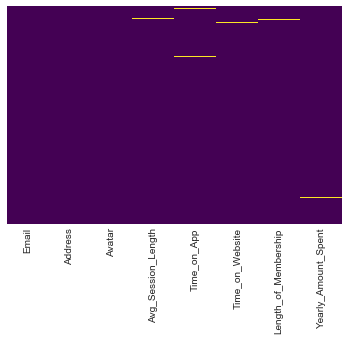

In [18]:
# Find out which columns have missing data & use the mean to fill in the missing data
sns.heatmap(customers.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [38]:
customers.replace([np.inf, -np.inf], np.nan)

customers.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg_Session_Length       True
Time_on_App              True
Time_on_Website          True
Length_of_Membership     True
Yearly_Amount_Spent      True
dtype: bool

In [42]:
median_list = customers.median()
fillnull_customers = customers.copy();

fillnull_customers['Avg_Session_Length'].fillna(median_list['Avg_Session_Length'] ,inplace = True)
fillnull_customers['Time_on_App'].fillna(median_list['Time_on_App'] ,inplace = True)
fillnull_customers['Time_on_Website'].fillna(median_list['Time_on_Website'] ,inplace = True)
fillnull_customers['Length_of_Membership'].fillna(median_list['Length_of_Membership'] ,inplace = True)
fillnull_customers['Yearly_Amount_Spent'].fillna(median_list['Yearly_Amount_Spent'] ,inplace = True)

fillnull_customers.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg_Session_Length      False
Time_on_App             False
Time_on_Website         False
Length_of_Membership    False
Yearly_Amount_Spent     False
dtype: bool

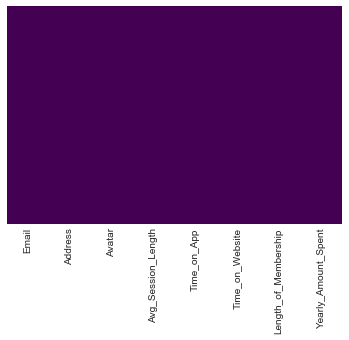

In [43]:
sns.heatmap(fillnull_customers.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

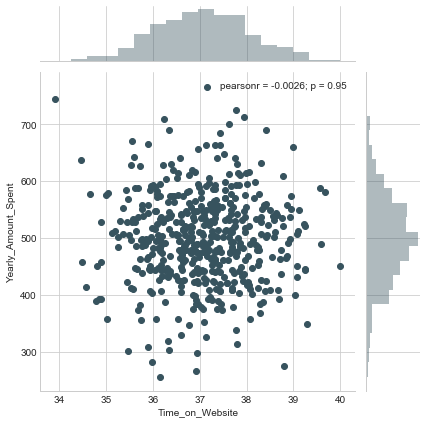

In [9]:
# More time on site, more money spent.
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=fillnull_customers)

** Do the same but with the Time on App column instead. **

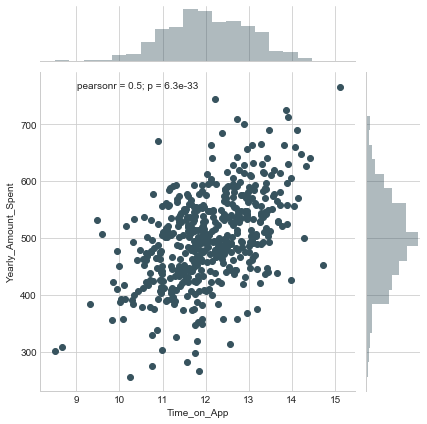

In [11]:
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=fillnull_customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

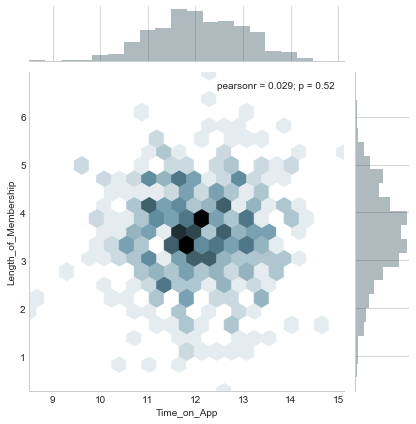

In [12]:
sns.jointplot(x='Time_on_App',y='Length_of_Membership',kind='hex',data=fillnull_customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

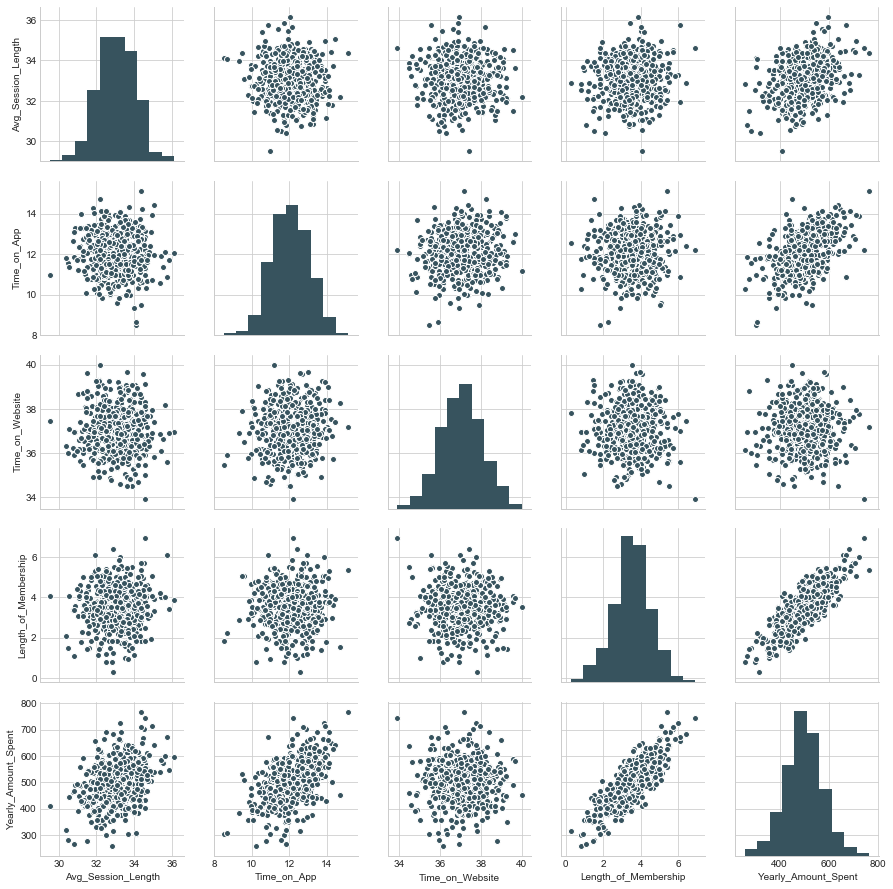

In [44]:
sns.pairplot(fillnull_customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [49]:
# Length of Membership 

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

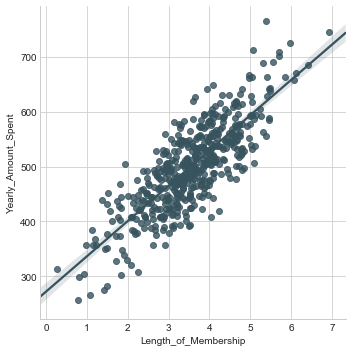

In [50]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=fillnull_customers)

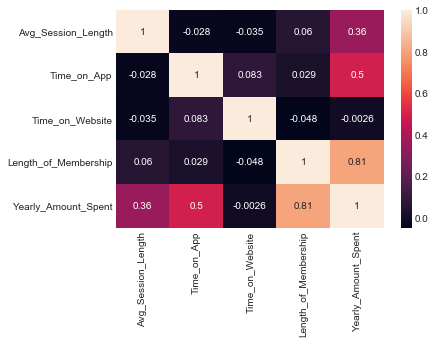

In [48]:
# Check correlation (heatmap)
sns.heatmap(fillnull_customers.corr(), annot=True)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [53]:
from sklearn.model_selection import train_test_split
X = fillnull_customers.drop(columns=['Email', 'Address', 'Avatar', 'Yearly_Amount_Spent'],axis=1)
y = fillnull_customers['Yearly_Amount_Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from scipy import stats

**Create an instance of a LinearRegression() model named lm.**

In [56]:
### STATSMODELS ###
statsTrain = X_train.join(pd.DataFrame(y_train))
statsTrain.head()

# create a fitted model using all Xs
lm = smf.ols(formula='Yearly_Amount_Spent ~ Avg_Session_Length + Time_on_App + Length_of_Membership', data=statsTrain).fit()

# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     6204.
Date:                 Wed, 13 Jun 2018   Prob (F-statistic):          2.34e-300
Time:                         14:51:52   Log-Likelihood:                -1314.2
No. Observations:                  350   AIC:                             2636.
Df Residuals:                      346   BIC:                             2652.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1041.5448     20.119    -51.769      0.000   -1081.116   -1001.974
Avg_Session_Length      25.9954      0.556     46.765      0.000      24.902      27.089
Time_on_App             38.6086      0.586     65.847      0.000      37.455      39.762
Length_of_Membership    61.2801      0.566    108.217      0.000      60.166      62.394
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.501
Skew:                          -0.091   Prob(JB):                        0.778
Kurtosis:                       2.970   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** Train/fit lm on the training data.**

In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.279554066274309
MSE: 81.52715077485395
RMSE: 9.029238659757198


**Print out the coefficients of the model**

In [60]:
# The coefficients
coeffecients = pd.DataFrame(lm.params)
coeffecients

,0
Intercept,-1041.544823
Avg_Session_Length,25.995427
Time_on_App,38.608637
Length_of_Membership,61.280092


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [61]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

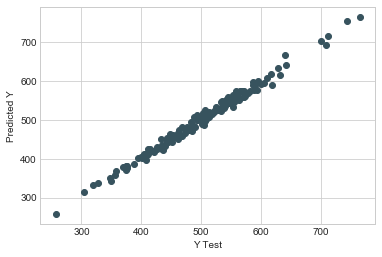

In [62]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [63]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.279554066274309
MSE: 81.52715077485395
RMSE: 9.029238659757198


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

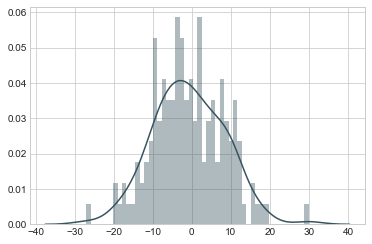

In [64]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [67]:
coeffecients = pd.DataFrame(lm.params)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Intercept,-1041.544823
Avg_Session_Length,25.995427
Time_on_App,38.608637
Length_of_Membership,61.280092


** How can you interpret these coefficients? **

Interpreting the coefficients:
สรุป model ที่ได้คือ

Yearly_Amount_Spent = -1041.544823 + 25.995427 * Avg_Session_Length + 38.608637 * Time_on_App + 61.280092 * Length_of_Membership

แปลความหมายได้ว่า
ถ้ามีการ แนะนำ in-store style ในระหว่าง sessions มากขึ้น สมาชิกจะจ่ายเงินต่อปีมากขึ้น เฉลี่ยนาทีละ 25.995427 
ถ้าสมาชิกใช้เวลา online บน App มากขึ้น สมาชิกจะจ่ายเงินต่อปีมากขึ้น เฉลี่ยนาทีละ 38.608637
และ
ถ้าสมาชิกเป็นสมาชิกต่อเนื่องไปเรื่อยๆ เขาก็จะจ่ายเงินต่อปีมากขึ้น  เฉลี่ยปีล่ะ 61.280092

สิ่งที่แนะนำให้ปฏิบัติ ถ้าต้องการให้สมาชิกจ่ายเงินต่อปีมากขึ้น คือ
1. จะต้องรักษาสมาชิกเดิมไว้ให้อยู่กับเราให้นานๆ 
2. เพิ่มการแนนำสินค้า ในระหว่าง sessions ให้มากขึ้น
3. ส่งเสริม และพัฒนาช่องทางนำเสนอสินค้าผ่าน App ให้มากขึ้น

**Do you think the company should focus more on their mobile app or on their website?**

## End Of Quiz